# Model.saccade

In order to see the modifications of the model caused by the changes in the different parameters, feel free to play with the sliders:

## Test the parameters

-----------------------------

{'fit': array([nan, nan, nan, ..., nan, nan, nan]), 'values_fit': [{'x_0': -0.035599050938075694, 'tau': 13.367680657604403, 'T0': 2.9999999361929355, 't1': 14.323387690198956, 't2': 13.31080273937112, 'tr': 0.6755835939382537, 'x1': 0.876166788873622, 'x2': 0.41295900852088785, 'do_whitening': False}, {'x_0': 0.4574889007273666, 'tau': 5.000271269555983, 'T0': 2.075676839911452, 't1': 13.278571434398003, 't2': 12.73731662605008, 'tr': 0.5836627339386569, 'x1': -0.68768743670788, 'x2': -0.21641552579347056, 'do_whitening': False}, {'x_0': 0.41090166248229354, 'tau': 37.32397131782378, 'T0': -1.8668711046427813, 't1': 10.644334551715032, 't2': 16.207820649396986, 'tr': 5.488230215141935, 'x1': 0.04261146808260463, 'x2': 2.775739625562945, 'do_whitening': False}], 'FitStatistics': [{'nfev': 750, 'chisqr': 0.0071067504479173085, 'redchi': 0.00022925001444894545, 'aic': -319.80060119236197, 'bic': -306.4921080233248}, {'nfev': 1089, 'chisqr': 0.0070942159167969665, 'redchi': 0.000236473863

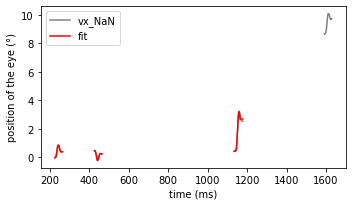

In [1]:
import ANEMO

Processing = ANEMO.ProcessingSaccades(dirpath='dataANEMO', sub='002')

#------------------------------------------------------------------------------
# Parameters:
#------------------------------------------------------------------------------
xname = 'saccade_deg' # The position of the saccades in degrees
trial = 8 # Number of the trial to be transformed
expname = 'sub-002_task-aSPEM' # Name of the particular experience to be
                               # transformed
                               # or list(PreProcessing.data.keys())[0]
model = ANEMO.Model.saccade # Model equation
# Function generating parameters to perform the fitting
generate_params = ANEMO.GenerateParams.saccade 
stime = None # Start time of the fitting
etime = -280 # End time of the fitting
step_fit = 2 # Number of steps for the fit
# Dictionary containing the parameters for the generate_params function
arg_generate_params = dict(do_whitening=False) 
toxname = None # Name of the data to be saved
return_ = True # If True returns the value, else saves it in results and data

#------------------------------------------------------------------------------
# to apply the function:
#------------------------------------------------------------------------------
Fit = Processing.Trial.Fit(xname,
                           trial,
                           expname,
                           model,
                           generate_params,
                           stime,
                           etime,
                           step_fit,
                           arg_generate_params,
                           toxname,
                           return_)
print(Fit)

#------------------------------------------------------------------------------
# to retrieve the raw data:
#------------------------------------------------------------------------------
data_exp = Processing.data[expname]
data = data_exp.Data
saccade_deg = data[data.trial==trial][xname].values

#------------------------------------------------------------------------------
# Plot:
#------------------------------------------------------------------------------
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1, figsize=(10/2, 10/(1.681*2)))

axs.plot(saccade_deg, 'k', alpha=.5, label='vx_NaN')
axs.plot(Fit['fit'], 'r', label='fit')
axs.set_xlabel('time (ms)')
axs.set_ylabel('position of the eye (°)')
axs.legend()

plt.tight_layout()
plt.show()

## Run it on a data set

----------------------------

In [2]:
import ANEMO

Processing = ANEMO.ProcessingSaccades(dirpath='dataANEMO', sub='002')

#------------------------------------------------------------------------------
# Parameters:
#------------------------------------------------------------------------------
xname = 'saccade_deg' # The position of the saccades in degrees
model = ANEMO.Model.saccade # Model equation
# Function generating parameters to perform the fitting
generate_params = ANEMO.GenerateParams.saccade
stime = None # Start time of the fitting
etime = -280 # End time of the fitting
step_fit = 2 # Number of steps for the fit
# Dictionary containing the parameters for the generate_params function
arg_generate_params = dict(do_whitening=False) 
toxname = None # Name of the data to be saved
expnames = 'sub-002_task-aSPEM' # Name of the particular experience to be
                                # transformed
                                # or list(PreProcessing.data.keys())[0] 
trials = trials = list(range(1, 16)) # List of the trial to be transformed
recalculate = False # Allows you to indicate if you want to force the
                    # calculation on the trials already processed
    
#------------------------------------------------------------------------------
# to apply the function:
#------------------------------------------------------------------------------
Processing.Data.Fit(xname,
                    model,
                    generate_params,
                    stime,
                    etime,
                    step_fit,
                    arg_generate_params,
                    toxname,
                    expnames,
                    trials,
                    recalculate)

calculates Fit_saccade from the file sub-002_task-aSPEM... finished
